# Leveraging weak learners via adaptive boosting
# AdaBoost:
<ul>
<li> The key concept behind boosting is to focus on training samples that are hard to classify, that is, to let the weak learners subsequently learn from misclassified training samples to improve the performance of the ensemble. </li>
<li>In contrast to bagging, the initial formulation of boosting, the algorithm uses random subsets of training samples drawn from the training dataset without replacement. </li>
<li>The original boosting procedure is summarized in four key steps as follows:</li>
<ol><li> Draw a random subset of training samples Leveraging weak learners via adaptive boosting without replacement from the training set Leveraging weak learners via adaptive boosting to train a weak learner Leveraging weak learners via adaptive boosting.</li><li>
Draw second random training subset Leveraging weak learners via adaptive boosting without replacement from the training set and add 50 percent of the samples that were previously misclassified to train a weak learner Leveraging weak learners via adaptive boosting.</li><li>
Find the training samples Leveraging weak learners via adaptive boosting in the training set Leveraging weak learners via adaptive boosting on which Leveraging weak learners via adaptive boosting and Leveraging weak learners via adaptive boosting disagree to train a third weak learner Leveraging weak learners via adaptive boosting.</li><li>
Combine the weak learners Leveraging weak learners via adaptive boosting, Leveraging weak learners via adaptive boosting, and Leveraging weak learners via adaptive boosting via majority voting.</li></ol>
</ul>

# Let's see AdaBoost in action using wine data:

In [1]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 
                   'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# Compute accuracy score for tree and ada:

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# tree score
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

# ada score
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))




Decision tree train/test accuracies 0.845/0.854
AdaBoost train/test accuracies 1.000/0.875


# Let's plot decision region

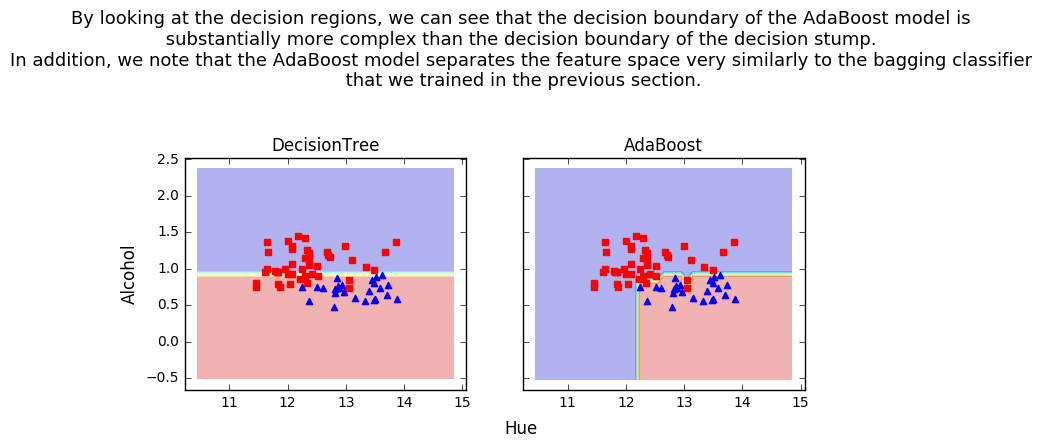

In [28]:
import matplotlib.pyplot as plt
x_min = X_train[:, 0].min() -1 
x_max = X_train[:, 0].max() +1 
y_min = X_train[:, 1].min() -1 
y_max = X_train[:, 1].max() +1 

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
X_input = np.c_[xx.ravel(), yy.ravel()]

f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8,3))
for idx, clf, label in zip([0,1], [tree, ada], ['DecisionTree', 'AdaBoost']):
    clf = clf.fit(X_train, y_train)
    Z = clf.predict(X_input).reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='r', marker='s')
    axarr[idx].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='b', marker='^')
    axarr[idx].set_title(label)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Hue', ha='center', va='center', fontsize=12) 
plt.text(10.2, 4, ha='center', va='center', fontsize=13, s='By looking at the decision regions, we can see that the decision boundary of the AdaBoost model is\n substantially more complex than the decision boundary of the decision stump. \nIn addition, we note that the AdaBoost model separates the feature space very similarly to the bagging classifier\n that we trained in the previous section.')
plt.show()
    

# Concluding remarks:
- As concluding remarks about ensemble techniques, it is worth noting that ensemble learning increases the computational complexity compared to individual classifiers. In practice, we need to think carefully whether we want to pay the price of increased computational costs for an often relatively modest improvement of predictive performance. 
- An often-cited example of this trade-off is the famous 1 Million dollars Netflix Prize, which was won using ensemble techniques. Although the winning team received the 1 million dollars prize money, Netflix never implemented their model due to its complexity, which made it unfeasible for a real-world application. 

Q&A:
    - decision tree vs decision tree stump?
    - in ada, when we say n_estimators = 500, does it mean tht one by one 500 trees are used and every time we include 50% of mis classified inputs for the next estimator?
    - 